In [2]:
# importing requierd libraries
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv('bank-full.csv', sep=';')
print('Shape of our data {}'.format(data.shape))

Shape of our data (45211, 17)


In [29]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Feature description
Bank client data:

1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)
Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [30]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Observation:
Our dataset do not have any null/nan/missing values.

In [33]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = [x for x in data.columns.to_list() if x not in categorical]
numerical.remove('y')

In [34]:
print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Text(0.5, 0, 'Target class')

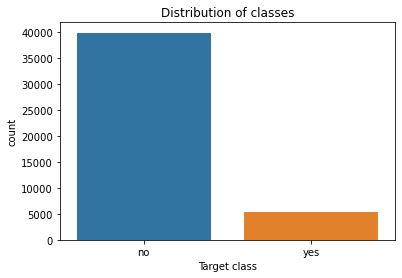

In [35]:
from matplotlib import pyplot as plt
sns.countplot(x=data['y'])
plt.title('Distribution of classes')
plt.xlabel('Target class')

In [36]:
data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Our dataset is highly imbalanced.

DATA ANALYSIS

pdays

Text(0.5, 0, 'y: target variable')

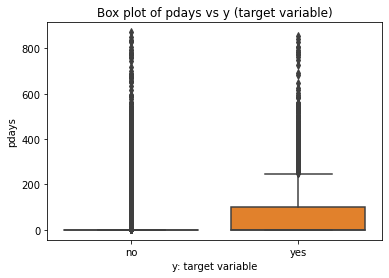

In [37]:
sns.boxplot(y=data['pdays'], x=data['y'])
plt.title('Box plot of pdays vs y (target variable)')
plt.xlabel('y: target variable')

Text(0.5, 1.0, 'PDF of pdays for target variable y')

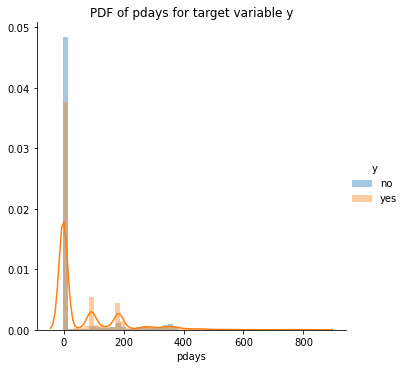

In [38]:
sns.FacetGrid(data, hue='y', size=5) \
.map(sns.distplot, 'pdays') \
.add_legend()
plt.title('PDF of pdays for target variable y')

In [39]:
data.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

Observation:

*The attribute pdays seems to be important feature as there is a clear distinction in quartile ranges of pdays for target variable yes and no.
*Mean of pdays is 40.20
*There are outliers as we can see from boxplot.

Duration

Text(0.5, 0, 'y:target variable')

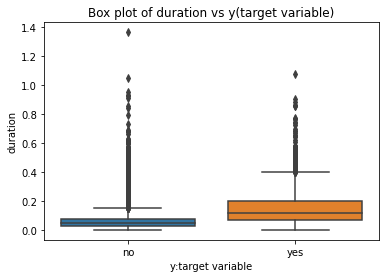

In [43]:
# converting call duration from seconds to minute
data['duration'] = data['duration']/60
sns.boxplot(y=data['duration'], x=data['y'])
plt.title('Box plot of duration vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 1.0, 'PDF of duration for target variable y')

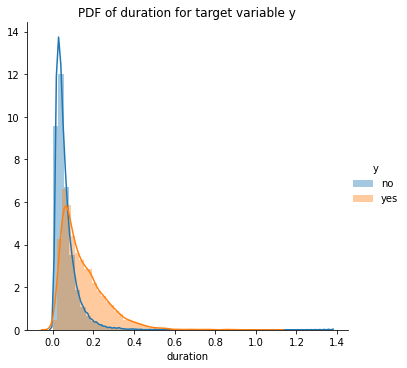

In [44]:
sns.FacetGrid(data, hue='y', size=5) \
.map(sns.distplot, 'duration') \
.add_legend()
plt.title('PDF of duration for target variable y')

In [45]:
data.duration.describe()

count    45211.000000
mean         0.071712
std          0.071536
min          0.000000
25%          0.028611
50%          0.050000
75%          0.088611
max          1.366111
Name: duration, dtype: float64

Observation:

*The attribute duration seems to be important feature as there is a clear distinction in quartile ranges of duration for target variable yes and no.
*Duration have a mean of 4.30 and standard-deviation 4.29
*There are outliers points in duration.

Age

Text(0.5, 0, 'y:target variable')

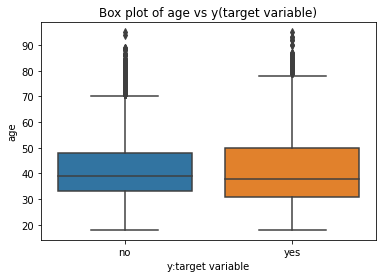

In [47]:
sns.boxplot(y=data['age'], x=data['y'])
plt.title('Box plot of age vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 1.0, 'PDF of age for target variable y')

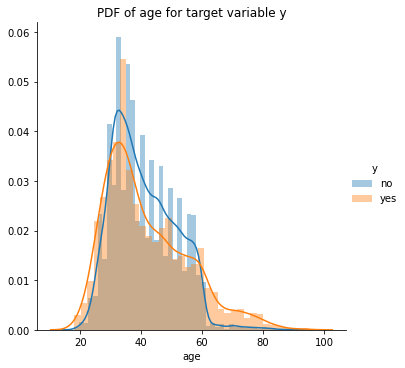

In [48]:
sns.FacetGrid(data, hue='y', size=5) \
.map(sns.distplot, 'age') \
.add_legend()
plt.title('PDF of age for target variable y')

In [49]:
data.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [51]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [52]:
count_age_response_pct = pd.crosstab(data['y'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

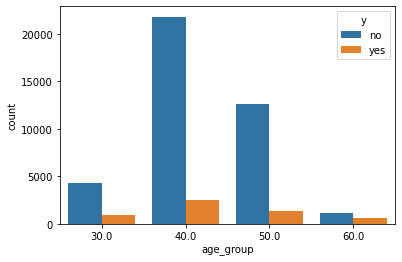

In [53]:
sns.countplot(x='age_group', data=data, hue='y')

Observation:

*People with age  30  between 60 have higher 


JOBS

In [54]:
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Text(0.5, 1.0, 'Count Plot of job for target variable')

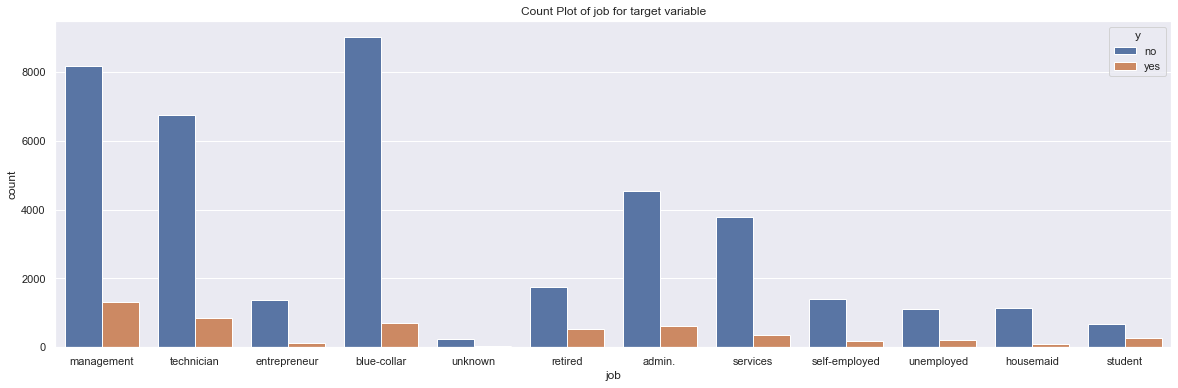

In [55]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=data['job'], data=data, hue=data['y'])
plt.title('Count Plot of job for target variable')

Observation:

*Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'


Poutcome

In [56]:
data.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Text(0.5, 1.0, 'Count Plot of poutcome for target variable')

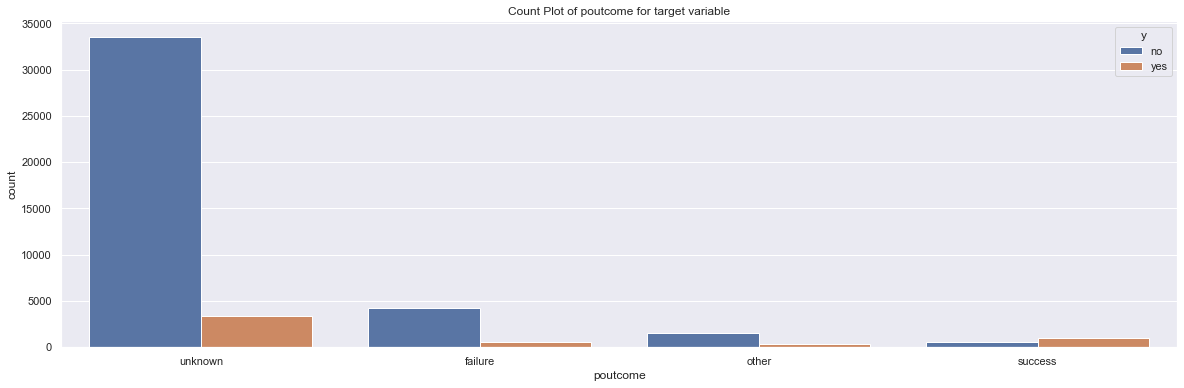

In [57]:
sns.countplot(x=data['poutcome'], data=data, hue=data['y'])
plt.title('Count Plot of poutcome for target variable')

Observation:

*Most of the clients contacted have previous outcome as 'unknown'.

Education

In [58]:
data.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Text(0.5, 1.0, 'Count plot of education for target variable y')

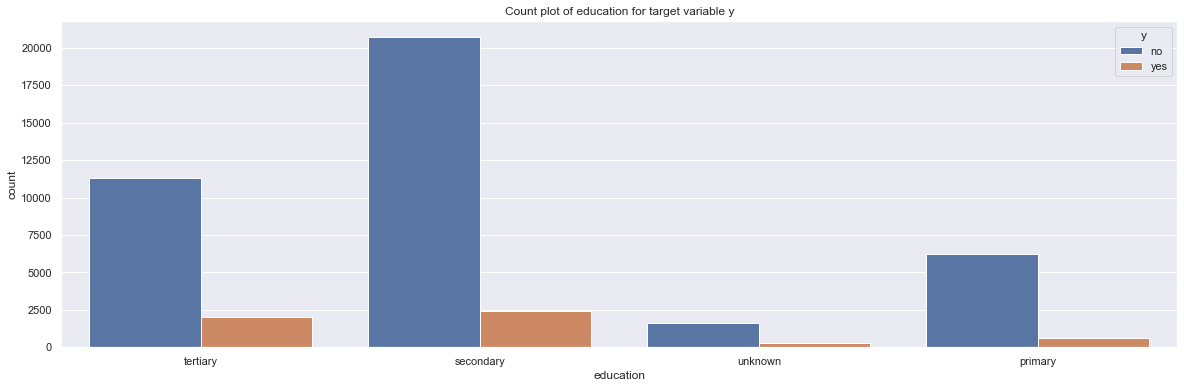

In [59]:
sns.countplot(x=data['education'], data=data, hue=data['y'])
plt.title('Count plot of education for target variable y')

Observation:

*Most of the people who are contacted have tertiray or secondary education.

Default

In [60]:
data.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

Text(0.5, 1.0, 'Count plot of default for target variable y')

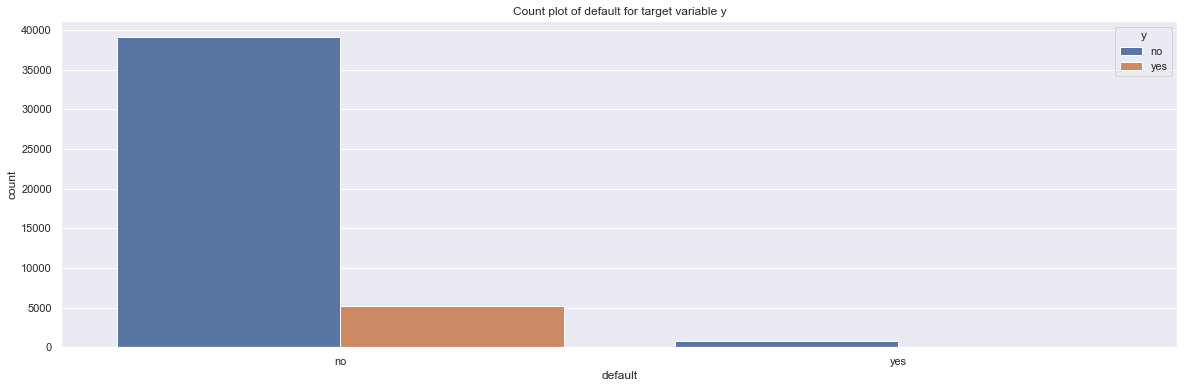

In [61]:
sns.countplot(x=data['default'], data=data, hue=data['y'])
plt.title('Count plot of default for target variable y')

In [62]:
data[data['default'] == 'yes'].y.count()

815

Observation:
*Very few clients are contacted who are defaulter,

Loan

In [63]:
data.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

Text(0.5, 1.0, 'Count plot of loan for target variable y')

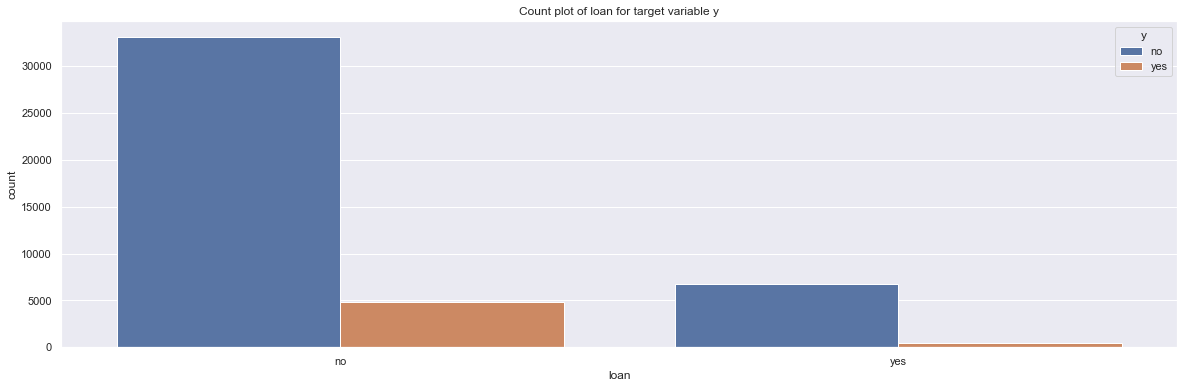

In [64]:
sns.countplot(x=data['loan'], data=data, hue=data['y'])
plt.title('Count plot of loan for target variable y')

Observation:

*As seen for default variable, less client are contacted who have loan.

Contact

In [65]:
data.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Text(0.5, 1.0, 'Count plot of contact for target variable y')

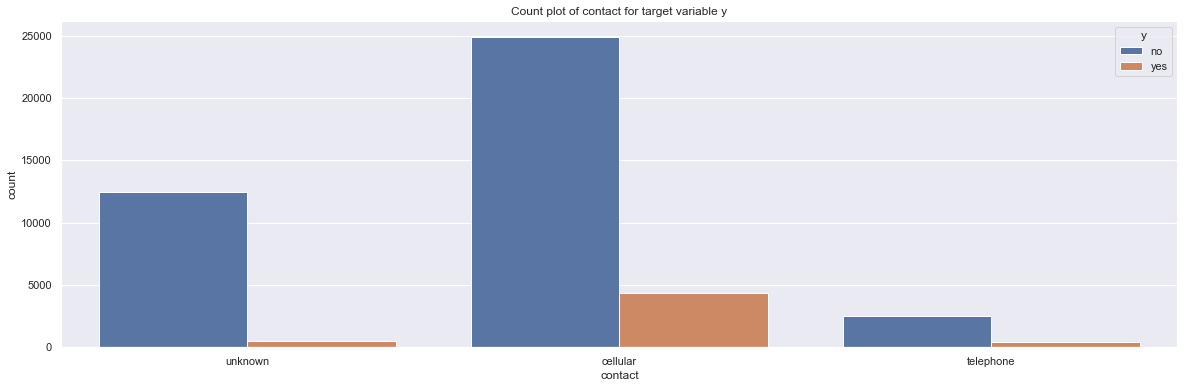

In [66]:
sns.countplot(x=data['contact'], data=data, hue=data['y'])
plt.title('Count plot of contact for target variable y')

Observation:
*Most of the people are contacted through cellular

Month

In [68]:
data.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

Text(0.5, 1.0, 'Count plot of month for target variable y')

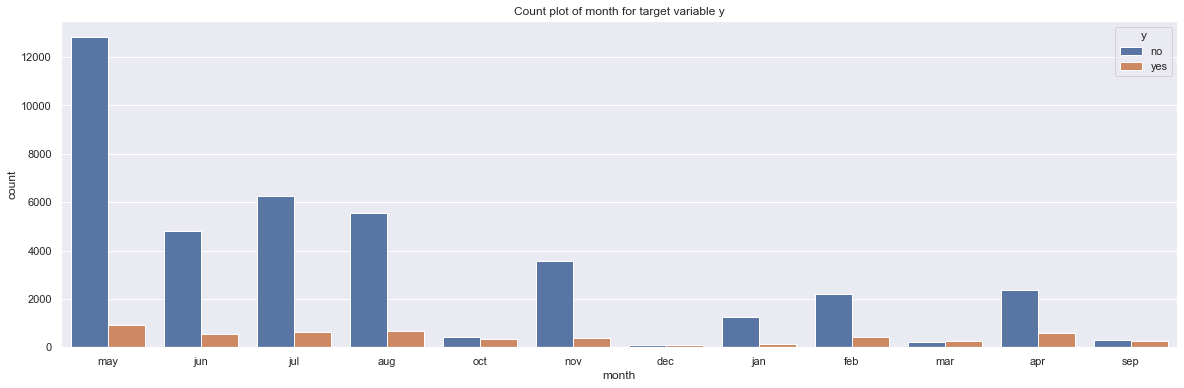

In [69]:
sns.countplot(x=data['month'], data=data, hue=data['y'])
plt.title('Count plot of month for target variable y')

Observation:

*Most of the clients  are contacted in the month of May 


Pairplot

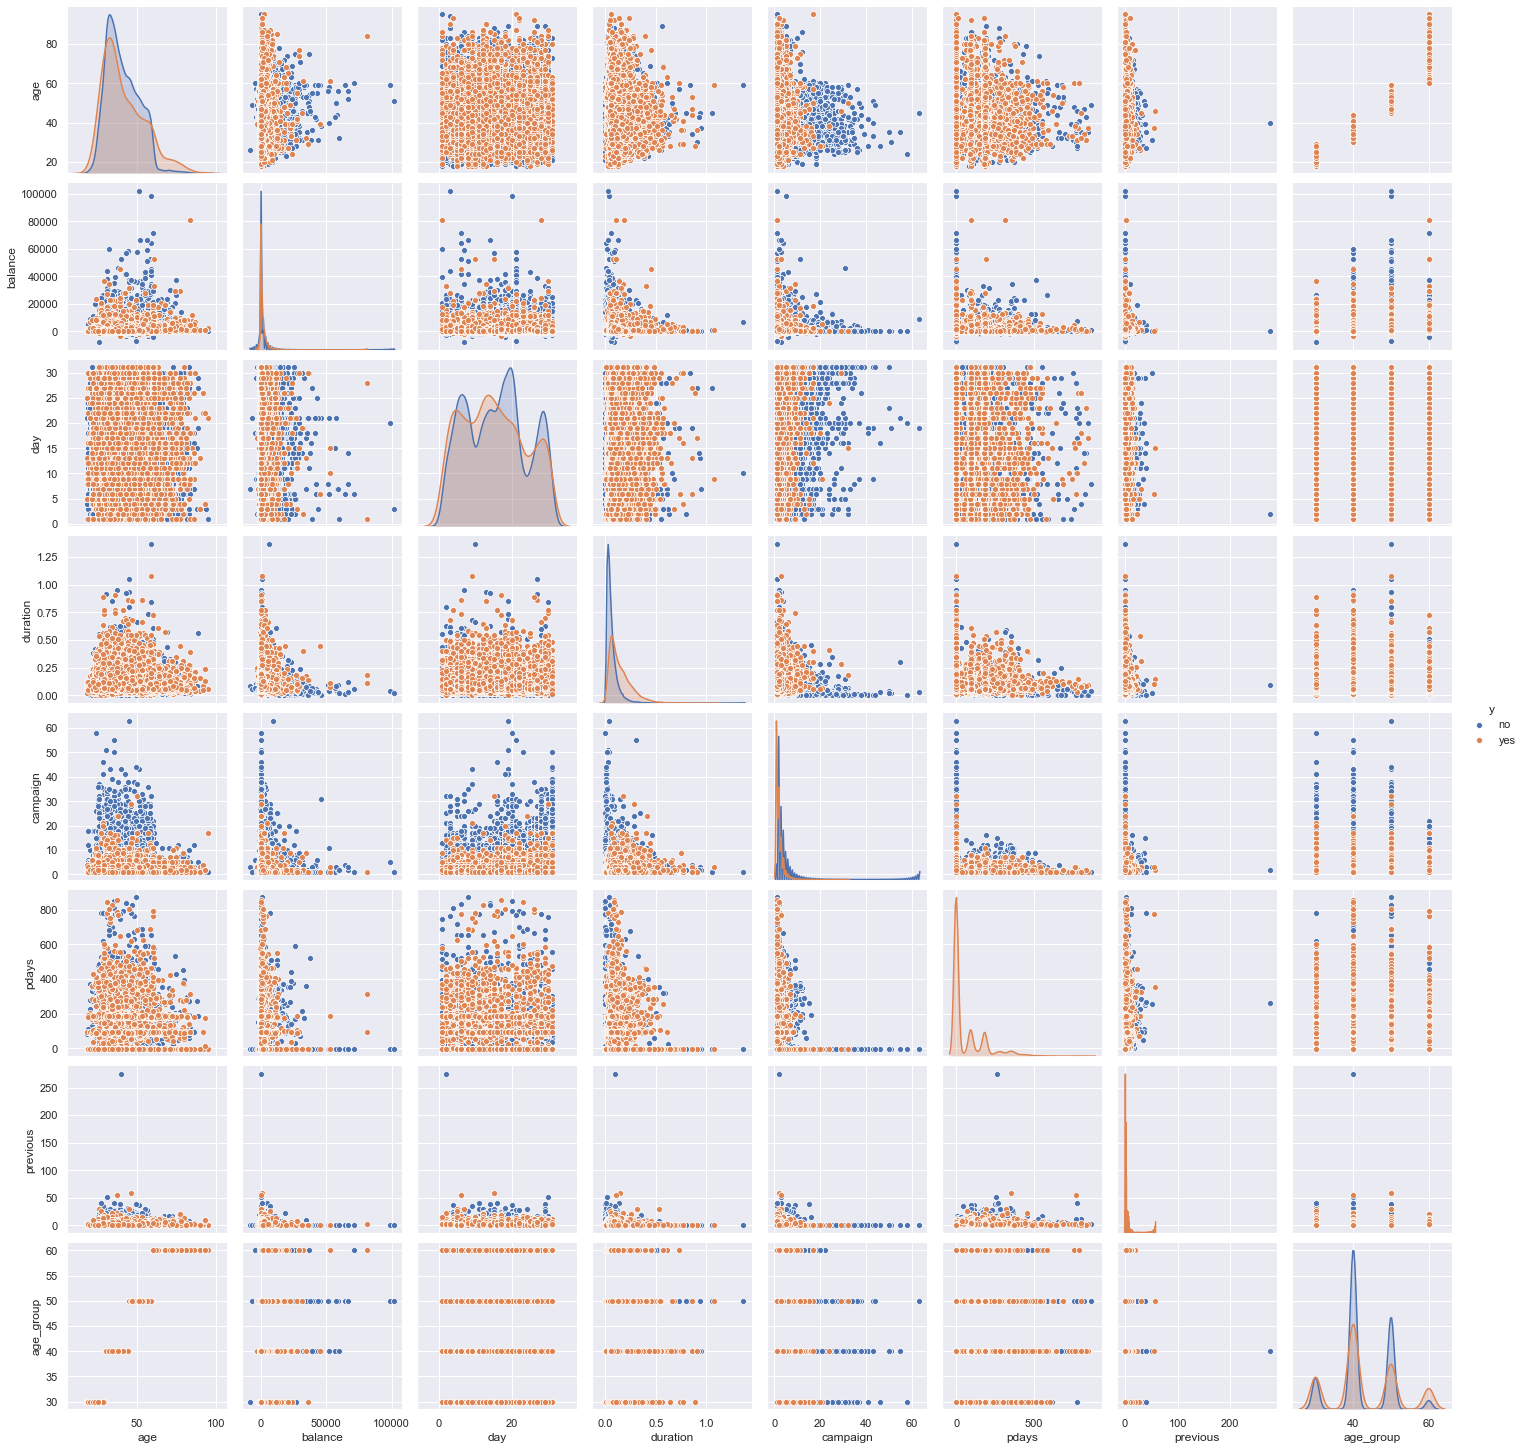

In [73]:
#data.drop('age_group', axis=1, inplace=True)
sns.pairplot(data, hue='y')

Observation:

*For most of the variables our pair plot is overlapping a lot.
*Pair plots of age-campaign and day-campaign are much efficient in distinguishing between different classes with very few overlapes.

Correlation matrix of numerical features

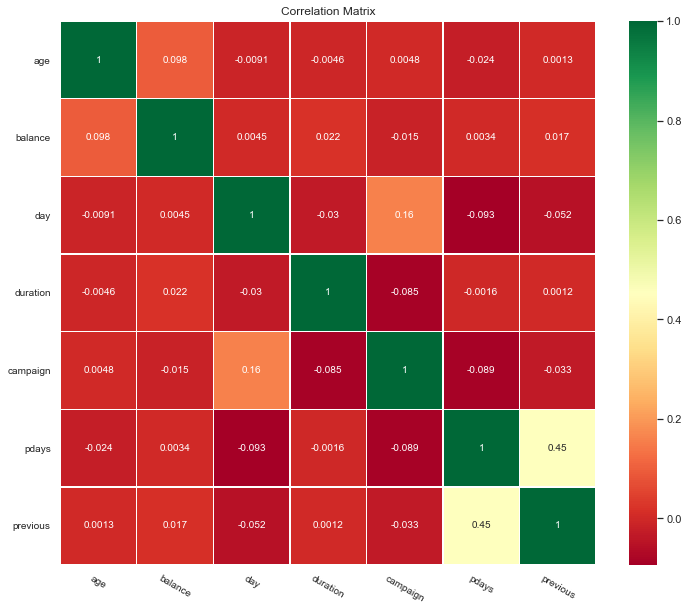

In [74]:
corr_data = data[numerical + ['y']]
corr = corr_data.corr()
plt.close()
cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Observation:

*Over numerical features have very less correlation between them.
*pdays and previous have higher correlation
*duration have a higher correlation with our target variable